In [139]:
%matplotlib inline  

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import sklearn.feature_selection as fs
from statsmodels.graphics.gofplots import ProbPlot
import statsmodels.api as sm
import pylab 

from jupyterthemes import jtplot
jtplot.style()

# for view all of datas
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 150)

df = pd.read_csv('data/train.csv',index_col='Id')

In [140]:
# check categorical value / numeric value
#df_raw.nunique()[map(lambda x : x<50, df_raw.nunique())]

pd.DataFrame({'unique count':df.nunique(),'null count':df.isnull().sum()})

,unique count,null count
MSSubClass,15,0
MSZoning,5,0
LotFrontage,110,259
LotArea,1073,0
Street,2,0
Alley,2,1369
LotShape,4,0
LandContour,4,0
Utilities,2,0
LotConfig,5,0


In [141]:
list(map(lambda x:{x: df[x].unique()}, df.columns))

[{'MSSubClass': array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
         180,  40])},
 {'MSZoning': array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)},
 {'LotFrontage': array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
          91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
          74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
          81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
          77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
          92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
          67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
          87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
          38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
         114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
          46.])},
 {'LotArea': array([ 8450,  9600, 

In [142]:
print(df.columns[41:57]) # kisoo

Index(['Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu'],
      dtype='object')


Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [143]:
df_3 = pd.concat([df.iloc[:,79:80], df.iloc[:,41:57]], axis=1)
pd.DataFrame({'null count':df_3.isnull().sum()})

,null count
SalePrice,0
Electrical,1
1stFlrSF,0
2ndFlrSF,0
LowQualFinSF,0
GrLivArea,0
BsmtFullBath,0
BsmtHalfBath,0
FullBath,0
HalfBath,0


In [149]:
df_3.FireplaceQu = df_3.FireplaceQu.fillna('NA') # without Fireplace, there is no FireplaceQu.
df_3.Electrical = df_3.Electrical.fillna('SBrkr') # since Utility column, there is electricity obviously, so it filled with most common Electrical type 'SBrkr'

df_3_c = df_3.loc[:,['SalePrice','Electrical','KitchenQual','Functional','FireplaceQu']]
df_3_n = df_3.loc[:,['SalePrice','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces']]
df_3_b = df_3.loc[:,['SalePrice','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces']]
df_3_o = df_3.loc[:,['SalePrice','1stFlrSF','GrLivArea']]
#df_3.isnull().sum()

In [151]:
df_3_o_scaled_log = np.log1p(df_3_o)

In [101]:
df_3.describe()

,SalePrice,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014
std,79442.502883,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666
min,34900.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,129975.000000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000
50%,163000.000000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000
75%,214000.000000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000
max,755000.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000


In [102]:
# numeric variables

df_3_n.nunique()

SalePrice       663
1stFlrSF        753
2ndFlrSF        417
LowQualFinSF     24
GrLivArea       861
BsmtFullBath      4
BsmtHalfBath      3
FullBath          4
HalfBath          3
BedroomAbvGr      8
KitchenAbvGr      4
TotRmsAbvGrd     12
Fireplaces        4
dtype: int64

In [103]:
df_3_n.corr()

,SalePrice,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces
SalePrice,1.000000,0.605852,0.319334,-0.025606,0.708624,0.227122,-0.016844,0.560664,0.284108,0.168213,-0.135907,0.533723,0.466929
1stFlrSF,0.605852,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531
2ndFlrSF,0.319334,-0.202646,1.000000,0.063353,0.687501,-0.169494,-0.023855,0.421378,0.609707,0.502901,0.059306,0.616423,0.194561
LowQualFinSF,-0.025606,-0.014241,0.063353,1.000000,0.134683,-0.047143,-0.005842,-0.000710,-0.027080,0.105607,0.007522,0.131185,-0.021272
GrLivArea,0.708624,0.566024,0.687501,0.134683,1.000000,0.034836,-0.018918,0.630012,0.415772,0.521270,0.100063,0.825489,0.461679
BsmtFullBath,0.227122,0.244671,-0.169494,-0.047143,0.034836,1.000000,-0.147871,-0.064512,-0.030905,-0.150673,-0.041503,-0.053275,0.137928
BsmtHalfBath,-0.016844,0.001956,-0.023855,-0.005842,-0.018918,-0.147871,1.000000,-0.054536,-0.012340,0.046519,-0.037944,-0.023836,0.028976
FullBath,0.560664,0.380637,0.421378,-0.000710,0.630012,-0.064512,-0.054536,1.000000,0.136381,0.363252,0.133115,0.554784,0.243671
HalfBath,0.284108,-0.119916,0.609707,-0.027080,0.415772,-0.030905,-0.012340,0.136381,1.000000,0.226651,-0.068263,0.343415,0.203649
BedroomAbvGr,0.168213,0.127401,0.502901,0.105607,0.521270,-0.150673,0.046519,0.363252,0.226651,1.000000,0.198597,0.676620,0.107570


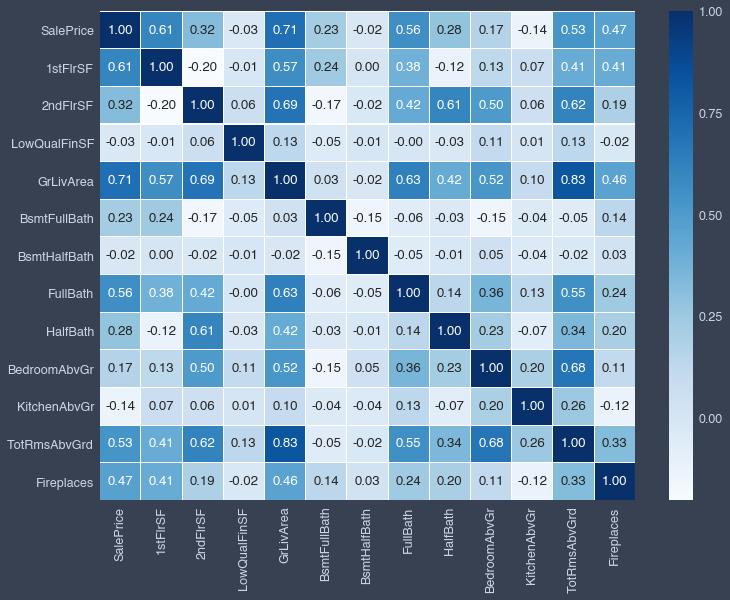

In [104]:
plt.figure(figsize=(12,9))
sns.heatmap(data = df_3_n.corr(), annot=True, fmt = '.2f', linewidths=.1, cmap='Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc759e446a0>,
      dtype=object)

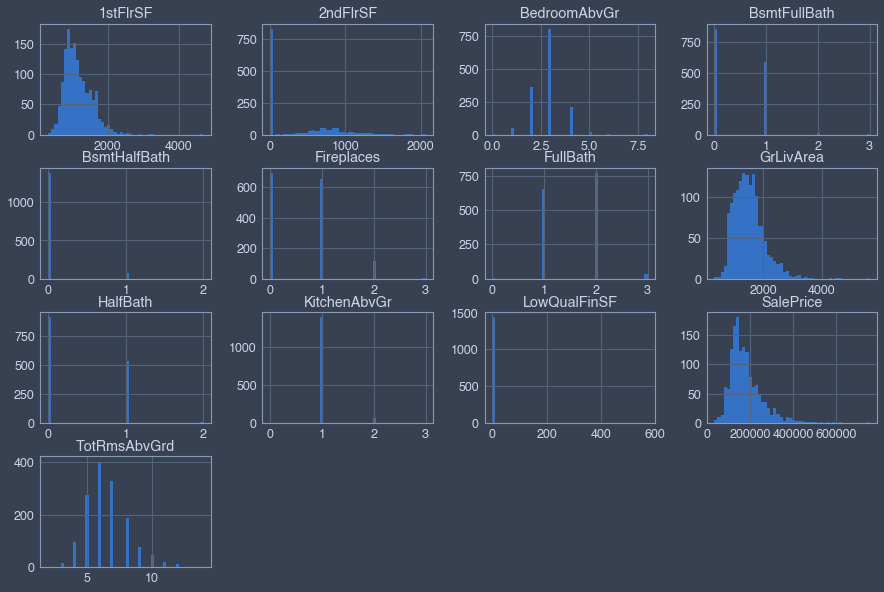

In [105]:
df_3_n.hist(bins=50, figsize=(15,10))

In [272]:
#check skewed data
skewed = [(df_3_n.columns[i],v) for i,v in enumerate(stats.skew(df_3_n)) if v>0.7]
list(zip(*skewed))

[('SalePrice',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtHalfBath',
  'KitchenAbvGr'),
 (1.8809407460340344,
  1.3753417421837948,
  0.8121942731961574,
  9.002080417658776,
  1.365155954773435,
  4.099185669542034,
  4.483784093860476)]

In [106]:
# standarization
scaler = StandardScaler()
df_3_n_scaled = scaler.fit_transform(df_3_n)
##### except salesprice
#scaler.fit(df_3_n.iloc[:,1:])
#df_3_n_scaled = scaler.transform(df_3_n.iloc[:,1:])
#df_3_n_scaled = pd.DataFrame(df_3_n_scaled)
#df_3_n_scaled['Id'] = range(1,1461)
#df_3_n_scaled.set_index('Id', inplace=True)
#df_3_n_scaled = pd.concat([df_3_n.iloc[:,0:1], df_3_n_scaled], axis=1)
df_3_n_scaled = pd.DataFrame(df_3_n_scaled, columns = df_3_n.columns)
df_3_n_scaled.head(5)

,SalePrice,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces
0,0.347273,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226
1,0.007288,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495
2,0.536154,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495
3,-0.515281,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495
4,0.869843,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495


In [287]:
# log transformation
df_3_n_scaled_log = np.log1p(df_3_n)
df_3_n_scaled_log.head(5)

,SalePrice,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces
Id,,,,,,,,,,,,,
1,12.247699,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,2.197225,0.000000
2,12.109016,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,1.098612,0.000000,1.386294,0.693147,1.945910,0.693147
3,12.317171,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,1.945910,0.693147
4,11.849405,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,0.693147,0.000000,1.386294,0.693147,2.079442,0.693147
5,12.429220,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,1.098612,0.693147,1.609438,0.693147,2.302585,0.693147


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc75a67fcf8>,
      dtype=object)

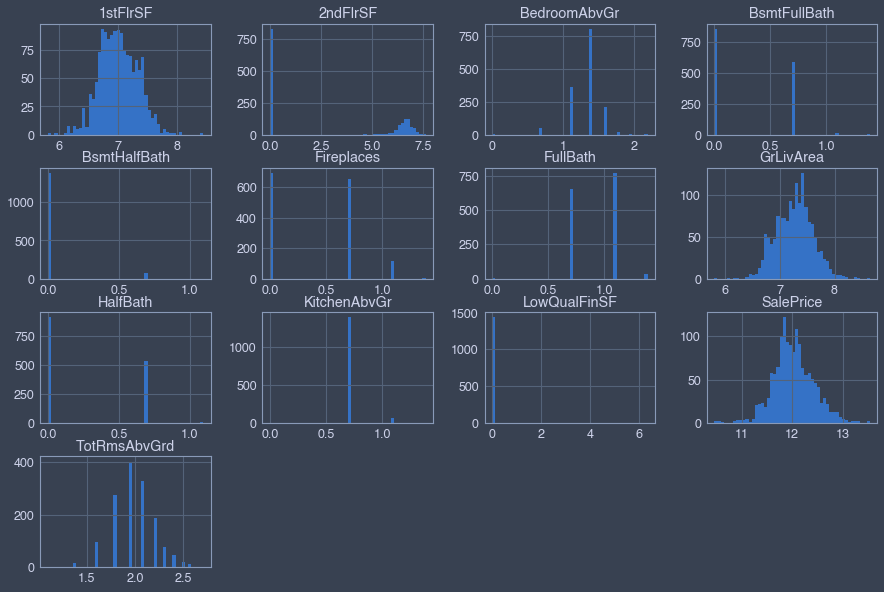

In [288]:
df_3_n_scaled_log.hist(bins=50, figsize=(15,10))

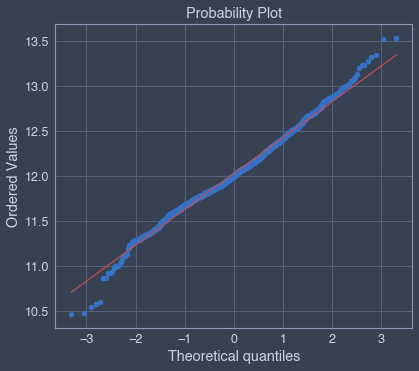

In [289]:
stats.probplot(df_3_n_scaled_log.SalePrice, dist="norm", plot=pylab)
pylab.show()

In [358]:
# box-cox transformation
#from scipy.special import boxcox1p
df_3_n_scaled_bc = pd.DataFrame()
for i in df_3_o.columns:
    #df_3_n_scaled_bc[i] = boxcox1p(df_3_o[i],0.3)
    df_3_n_scaled_bc[i] = stats.boxcox(df_3_o[i])[0]
df_3_n_scaled_bc

,SalePrice,1stFlrSF,GrLivArea
0,7.932610,5.235744,7.621710
1,7.878263,5.460253,7.303621
2,7.959618,5.277966,7.667291
3,7.774955,5.303382,7.625992
4,8.002875,5.404626,7.885037
5,7.783469,5.192945,7.383408
6,8.081202,5.625997,7.611858
7,7.916361,5.385229,7.832157
8,7.744773,5.339109,7.660224
9,7.705789,5.369401,7.137886


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc72a065f28>,
      dtype=object)

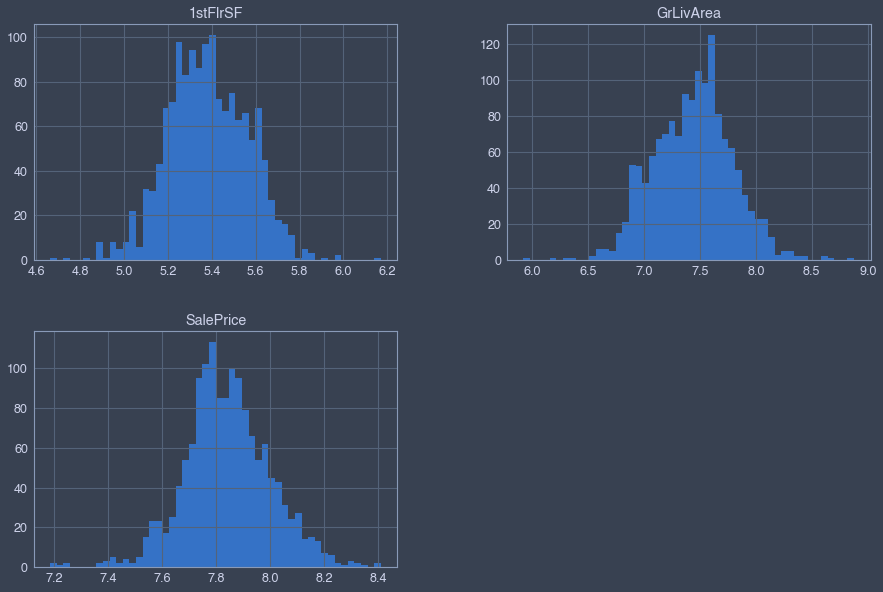

In [359]:
df_3_n_scaled_bc.hist(bins=50, figsize=(15,10))

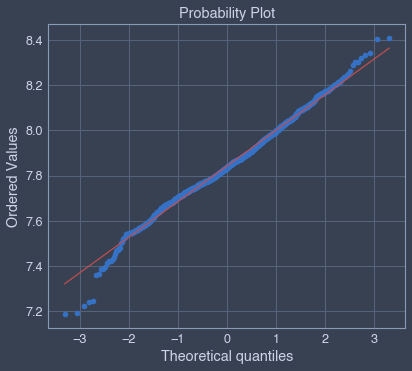

In [360]:
stats.probplot(df_3_n_scaled_bc.SalePrice, dist="norm", plot=pylab)
pylab.show()

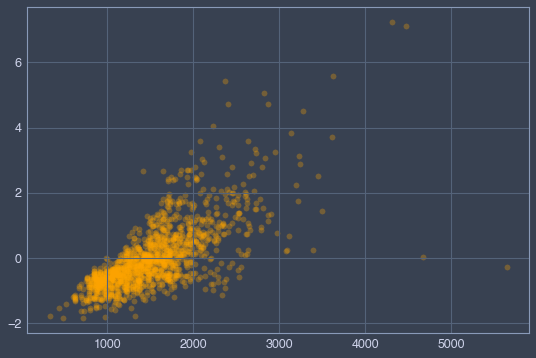

In [110]:
plt.figure(figsize=(9, 6))
plt.scatter(df_3_n['GrLivArea'],df_3_n_scaled['SalePrice'], alpha='0.3', color='orange', cmap='viridis')
#plt.scatter(df_3_n['GrLivArea'],df_3_n['SalePrice'], alpha='0.3', color='orange', cmap='viridis')

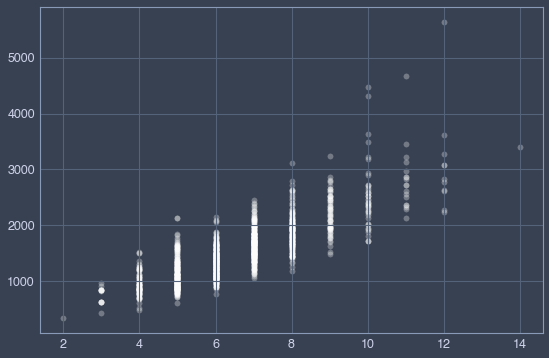

In [111]:
plt.figure(figsize=(9, 6))
plt.scatter(df_3_n['TotRmsAbvGrd'], df_3_n['GrLivArea'], alpha='0.3', color='white', cmap='viridis')

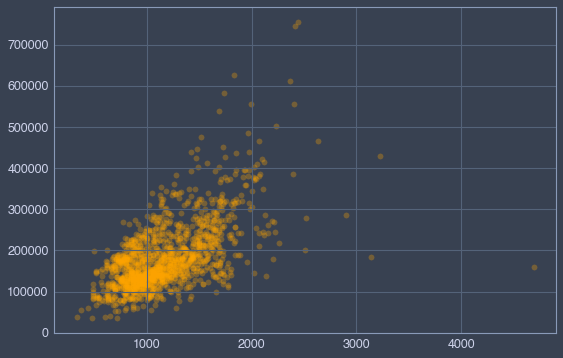

In [112]:
plt.figure(figsize=(9, 6))
plt.scatter(df_3_n['1stFlrSF'],df_3_n['SalePrice'], alpha='0.3', color='orange', cmap='viridis')

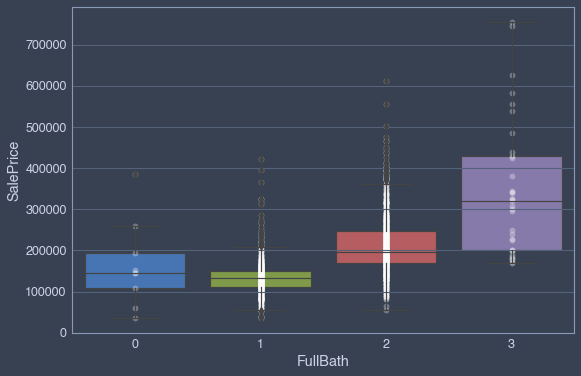

In [113]:
plt.figure(figsize=(9, 6))
plt.scatter(df_3_n['FullBath'],df_3_n['SalePrice'], alpha='0.3', color='white', cmap='viridis')
sns.boxplot(df_3_n['FullBath'],df_3_n['SalePrice'])


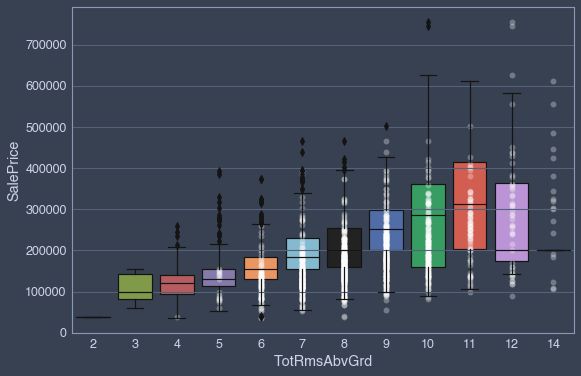

In [114]:
plt.figure(figsize=(9, 6))
plt.scatter(df_3_n['TotRmsAbvGrd'],df_3_n['SalePrice'], alpha='0.3', color='white', cmap='viridis')
sns.boxplot(df_3_n['TotRmsAbvGrd'],df_3_n['SalePrice'])

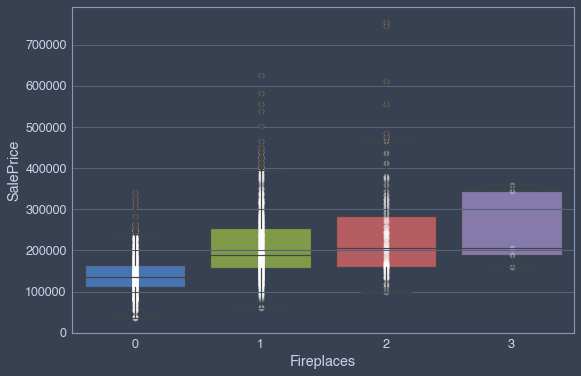

In [115]:
plt.figure(figsize=(9, 6))
plt.scatter(df_3_n['Fireplaces'],df_3_n['SalePrice'], alpha='0.3', color='white', cmap='viridis')
sns.boxplot(df_3_n['Fireplaces'],df_3_n['SalePrice'])

In [116]:
en = ElasticNet(l1_ratio = 0.5, normalize=False)
alphas = np.linspace(0.1,2.1,20)
coefs_en = []

for alpha in alphas:
    en.set_params(alpha=alpha)
    en.fit(df_3_n_scaled.iloc[:,1:],df_3_n_scaled['SalePrice'])  
    coefs_en.append(en.coef_)

coefs_en = pd.DataFrame(coefs_en, index = alphas, columns = df_3_n_scaled.iloc[:,1:].columns)  
coefs_en.head()

,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces
0.100000,0.243158,0.0,-0.005433,0.335868,0.094756,0.0,0.201111,0.077321,-0.059119,-0.134502,0.027453,0.061755
0.205263,0.212646,0.0,-0.000000,0.319218,0.054948,0.0,0.154776,0.033467,-0.000000,-0.079935,0.000000,0.061315
0.310526,0.180693,0.0,-0.000000,0.307656,0.013769,-0.0,0.116286,0.000000,-0.000000,-0.027712,0.000000,0.053475
0.415789,0.157870,0.0,-0.000000,0.280674,0.000000,-0.0,0.088724,0.000000,-0.000000,-0.000000,0.000000,0.035618
0.521053,0.134121,0.0,-0.000000,0.257258,0.000000,-0.0,0.066517,0.000000,-0.000000,-0.000000,0.000000,0.012981


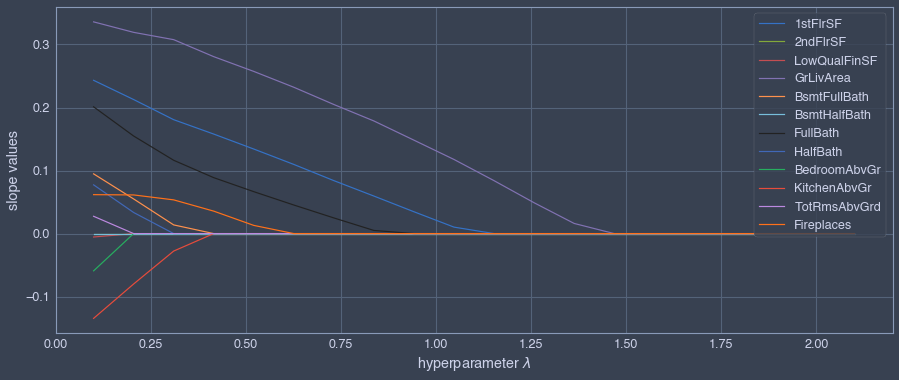

In [117]:
plt.figure(figsize=(15, 6))
for name in coefs_en.columns:
    plt.plot(coefs_en.index, coefs_en[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.legend(loc=1)   

In [118]:
#feature selection
fs.VarianceThreshold(threshold = 1).fit_transform(df_3_n)

array([[208500,    856,    854,      0,   1710,      8],
       [181500,   1262,      0,      0,   1262,      6],
       [223500,    920,    866,      0,   1786,      6],
       ...,
       [266500,   1188,   1152,      0,   2340,      9],
       [142125,   1078,      0,      0,   1078,      5],
       [147500,   1256,      0,      0,   1256,      6]])

In [119]:
# categorical variables
list(map(lambda x: df_3_c[x].value_counts(), df_3_c.columns[1:]))

[SBrkr    1335
 FuseA      94
 FuseF      27
 FuseP       3
 Mix         1
 Name: Electrical, dtype: int64, TA    735
 Gd    586
 Ex    100
 Fa     39
 Name: KitchenQual, dtype: int64, Typ     1360
 Min2      34
 Min1      31
 Mod       15
 Maj1      14
 Maj2       5
 Sev        1
 Name: Functional, dtype: int64, NA    690
 Gd    380
 TA    313
 Fa     33
 Ex     24
 Po     20
 Name: FireplaceQu, dtype: int64]

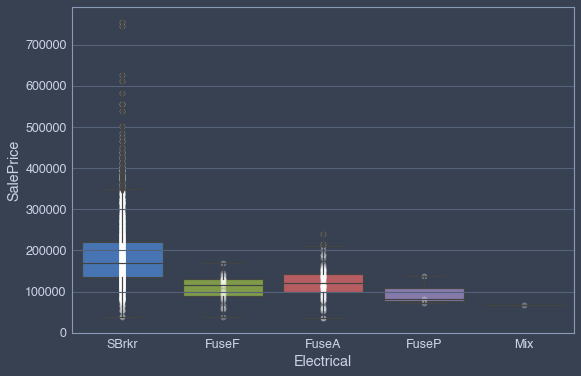

In [120]:
plt.figure(figsize=(9, 6))
plt.scatter(df_3_c['Electrical'], df_3_c['SalePrice'], alpha='0.3', color='white', cmap='viridis')
sns.boxplot(df_3_c['Electrical'], df_3_c['SalePrice'])

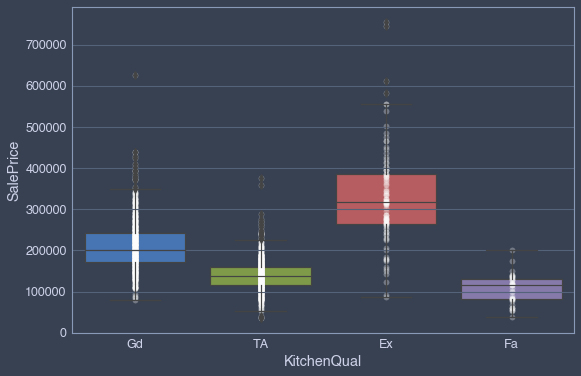

In [121]:
plt.figure(figsize=(9, 6))
plt.scatter(df_3_c['KitchenQual'], df_3_c['SalePrice'], alpha='0.3', color='white', cmap='viridis')
sns.boxplot(df_3_c['KitchenQual'], df_3_c['SalePrice'])

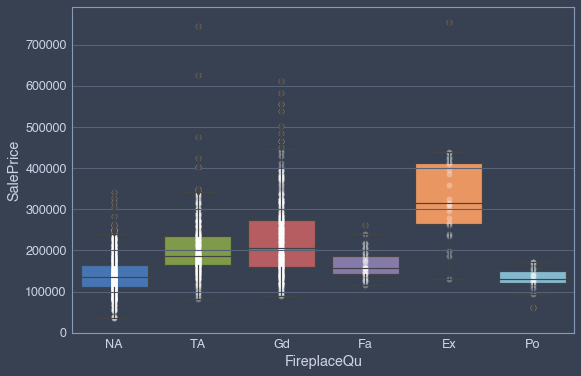

In [122]:
plt.figure(figsize=(9, 6))
plt.scatter(df_3_c['FireplaceQu'], df_3_c['SalePrice'], alpha='0.3', color='white', cmap='viridis')
sns.boxplot(df_3_c['FireplaceQu'], df_3_c['SalePrice'])

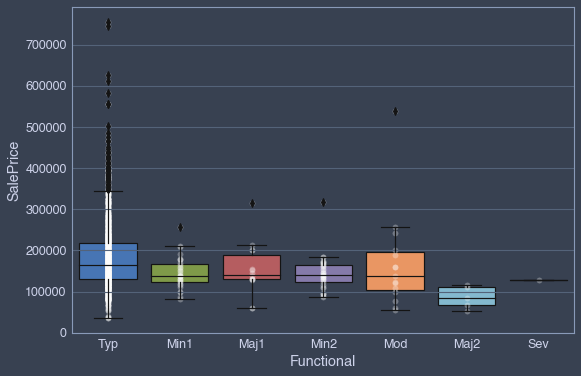

In [123]:
plt.figure(figsize=(9, 6))
plt.scatter(df_3_c['Functional'], df_3_c['SalePrice'], alpha='0.3', color='white', cmap='viridis')
sns.boxplot(df_3_c['Functional'], df_3_c['SalePrice'])

In [124]:
# Convert string to numeric and merge some category because of small number
df_3_c['Electrical'] = df_3_c['Electrical'].apply(lambda x:0 if x=='FuseP' else 1 if x=='FuseF' else 2 if x=='FuseA' else 3 if x=='Mix' else 4)
df_3_c['KitchenQual'] = df_3_c['KitchenQual'].apply(lambda x:0 if x=='Po' else 1 if x=='Fa' else 2 if x=='TA' else 3 if x=='Gd' else 4)
df_3_c['FireplaceQu'] = df_3_c['FireplaceQu'].apply(lambda x:0 if x=='NA' else 1 if x=='Po' else 2 if x=='Fa' else 3 if x=='TA' else 4 if x=='Gd' else 5)
df_3_c['Functional'] = df_3_c['Functional'].apply(lambda x:0 if x=='Sal' else 1 if x=='Sev' else 2 if x=='Maj1' or x=='Maj2' else 3 if x=='Mod' else 4 if x=='Min1' or x=='Min2' else 5)

list(map(lambda x: df_3_c[x].value_counts(), df_3_c.columns[1:]))

[4    1335
 2      94
 1      27
 0       3
 3       1
 Name: Electrical, dtype: int64, 2    735
 3    586
 4    100
 1     39
 Name: KitchenQual, dtype: int64, 5    1360
 4      65
 2      19
 3      15
 1       1
 Name: Functional, dtype: int64, 0    690
 4    380
 3    313
 2     33
 5     24
 1     20
 Name: FireplaceQu, dtype: int64]

In [125]:
df_3_c.groupby('Electrical')['SalePrice'].agg(['min','max','mean','median','std']).sort_values('mean')

,min,max,mean,median,std
Electrical,,,,,
3,67000,67000,67000.000000,67000,NaN
0,73000,137000,97333.333333,82000,34645.827070
1,39300,169500,107675.444444,115000,30636.507376
2,34900,239000,122196.893617,121250,37511.376615
4,37900,755000,186810.637453,170000,79828.273697


In [126]:
df_3_c.groupby('KitchenQual')['SalePrice'].agg(['min','max','mean','median','std']).sort_values('mean')

,min,max,mean,median,std
KitchenQual,,,,,
1,39300,200000,105565.205128,115000,36004.254037
2,34900,375000,139962.511565,137000,38896.280336
3,79000,625000,212116.023891,201400,64020.176702
4,86000,755000,328554.670000,316750,120862.942573


In [127]:
df_3_c.groupby('Functional')['SalePrice'].agg(['min','max','mean','median','std']).sort_values('mean')

,min,max,mean,median,std
Functional,,,,,
1,129000,129000,129000.000000,129000,NaN
2,52000,315000,136014.421053,130000,64176.181080
4,82000,316600,145263.569231,139900,39460.490952
3,55000,538000,168393.333333,137900,118938.666467
5,34900,755000,183429.147059,165500,80017.959658


In [128]:
df_3_c.groupby('FireplaceQu')['SalePrice'].agg(['min','max','mean','median','std']).sort_values('mean')

,min,max,mean,median,std
FireplaceQu,,,,,
1,60000,172000,129764.150000,131500,31080.842115
0,34900,342643,141331.482609,135000,44389.786884
2,117000,262000,167298.484848,158000,34287.717564
3,82500,745000,205723.488818,187500,71367.028772
4,90350,611657,226351.415789,206950,91123.148369
5,130500,755000,337712.500000,314250,123611.471764


In [129]:
#stats.chisquare(df_3_c.iloc[:,1:4],df_3_c.SalePrice)

In [130]:
df_3_c.columns[1:]

Index(['Electrical', 'KitchenQual', 'Functional', 'FireplaceQu'], dtype='object')

In [131]:
for i in df_3_c.columns[1:]:
    X = df_3_c.SalePrice
    Y = df_3_c[i]
    chi2 = stats.chi2_contingency(pd.crosstab(Y,X))
    print('** SalesPrice - ' + str(i) + ' **')
    print('chi^2 : ' + str(chi2[0]))
    print('p value : ' + str(chi2[1]))
    print('degree of freedom : ' + str(chi2[2]))
    print('')

** SalesPrice - Electrical **
chi^2 : 2766.812801319597
p value : 0.052835134010111195
degree of freedom : 2648

** SalesPrice - KitchenQual **
chi^2 : 2811.8004076403004
p value : 1.282074499167363e-31
degree of freedom : 1986

** SalesPrice - Functional **
chi^2 : 1990.212926514667
p value : 1.0
degree of freedom : 2648

** SalesPrice - FireplaceQu **
chi^2 : 3763.8996461233037
p value : 4.387723294930742e-08
degree of freedom : 3310



In [132]:
fs.chi2(df_3_c.iloc[:,1:].to_numpy(), df_3_c.SalePrice)
fs.SelectKBest(fs.chi2, k=2).fit_transform(df_3_c.iloc[:,1:].to_numpy(), df_3_c.SalePrice)

array([[3, 0],
       [2, 3],
       [3, 3],
       ...,
       [3, 4],
       [3, 0],
       [2, 0]])

In [133]:
for i in df_3_b.columns[1:]:
    X = df_3_b.SalePrice
    Y = df_3_b[i]
    chi2 = stats.chi2_contingency(pd.crosstab(Y,X))
    print('** SalesPrice - ' + str(i) + ' **')
    print('chi^2 : ' + str(chi2[0]))
    print('p value : ' + str(chi2[1]))
    print('degree of freedom : ' + str(chi2[2]))
    print('')

** SalesPrice - BsmtFullBath **
chi^2 : 2045.5150583176737
p value : 0.1721744575658352
degree of freedom : 1986

** SalesPrice - BsmtHalfBath **
chi^2 : 1432.7241009374811
p value : 0.01920287059809265
degree of freedom : 1324

** SalesPrice - FullBath **
chi^2 : 2938.6092241251417
p value : 3.417273549795926e-40
degree of freedom : 1986

** SalesPrice - HalfBath **
chi^2 : 1610.94031307264
p value : 8.45863480573638e-08
degree of freedom : 1324

** SalesPrice - BedroomAbvGr **
chi^2 : 4498.074395696101
p value : 0.9220531103160822
degree of freedom : 4634

** SalesPrice - KitchenAbvGr **
chi^2 : 1270.4464540824533
p value : 1.0
degree of freedom : 1986

** SalesPrice - TotRmsAbvGrd **
chi^2 : 8752.959289557119
p value : 1.0667300690037342e-30
degree of freedom : 7282

** SalesPrice - Fireplaces **
chi^2 : 2137.9655528160392
p value : 0.009067293632029683
degree of freedom : 1986



In [134]:
def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')


def diagnostic_plots(X, y, model_fit=None):
  """
  Function to reproduce the 4 base plots of an OLS model in R.

  ---
  Inputs:

  X: A numpy array or pandas dataframe of the features to use in building the linear regression model

  y: A numpy array or pandas series/dataframe of the target variable of the linear regression model

  model_fit [optional]: a statsmodel.api.OLS model after regressing y on X. If not provided, will be
                        generated from X, y
  """

  if not model_fit:
      model_fit = sm.OLS(y, sm.add_constant(X)).fit()

  # create dataframe from X, y for easier plot handling
  dataframe = pd.concat([X, y], axis=1)

  # model values
  model_fitted_y = model_fit.fittedvalues
  # model residuals
  model_residuals = model_fit.resid
  # normalized residuals
  model_norm_residuals = model_fit.get_influence().resid_studentized_internal
  # absolute squared normalized residuals
  model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
  # absolute residuals
  model_abs_resid = np.abs(model_residuals)
  # leverage, from statsmodels internals
  model_leverage = model_fit.get_influence().hat_matrix_diag
  # cook's distance, from statsmodels internals
  model_cooks = model_fit.get_influence().cooks_distance[0]

  plot_lm_1 = plt.figure()
  plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                            lowess=True,
                            scatter_kws={'alpha': 0.5},
                            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

  plot_lm_1.axes[0].set_title('Residuals vs Fitted')
  plot_lm_1.axes[0].set_xlabel('Fitted values')
  plot_lm_1.axes[0].set_ylabel('Residuals');

  # annotations
  abs_resid = model_abs_resid.sort_values(ascending=False)
  abs_resid_top_3 = abs_resid[:3]
  for i in abs_resid_top_3.index:
      plot_lm_1.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_residuals[i]));

  QQ = ProbPlot(model_norm_residuals)
  plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
  plot_lm_2.axes[0].set_title('Normal Q-Q')
  plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
  plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
  # annotations
  abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
  abs_norm_resid_top_3 = abs_norm_resid[:3]
  for r, i in enumerate(abs_norm_resid_top_3):
      plot_lm_2.axes[0].annotate(i,
                                 xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                     model_norm_residuals[i]));

  plot_lm_3 = plt.figure()
  plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
  sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
  plot_lm_3.axes[0].set_title('Scale-Location')
  plot_lm_3.axes[0].set_xlabel('Fitted values')
  plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

  # annotations
  abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
  abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
  for i in abs_norm_resid_top_3:
      plot_lm_3.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_norm_residuals_abs_sqrt[i]));


  plot_lm_4 = plt.figure();
  plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
  sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
  plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
  plot_lm_4.axes[0].set_ylim(-3, 5)
  plot_lm_4.axes[0].set_title('Residuals vs Leverage')
  plot_lm_4.axes[0].set_xlabel('Leverage')
  plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

  # annotations
  leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
  for i in leverage_top_3:
      plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));

  p = len(model_fit.params) # number of model parameters
  graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50),
        'Cook\'s distance') # 0.5 line
  graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50)) # 1 line
  plot_lm_4.legend(loc='upper right');

In [158]:
df_3_o

,SalePrice,1stFlrSF,GrLivArea
Id,,,
1,208500,856,1710
2,181500,1262,1262
3,223500,920,1786
4,140000,961,1717
5,250000,1145,2198
6,143000,796,1362
7,307000,1694,1694
8,200000,1107,2090
9,129900,1022,1774


In [172]:
a,b = stats.boxcox(df_3_o.SalePrice)
b

-0.07692391328663316

In [167]:
df_3_o_bc2,_ = stats.boxcox(df_3_o.GrLivArea)

In [169]:
diagnostic_plots(pd.DataFrame(df_3_o_bc2),pd.DataFrame(df_3_o_bc))

ValueError: all the input array dimensions except for the concatenation axis must match exactly

<Figure size 460.8x403.2 with 0 Axes>